ESOL data

1. There are different properties of molecules inside dataset like 'Minimum Degree', 'Molecular Weight', 'Number of H-Bond Donors', 'Number of Rings', 'Number of Rotatable Bonds', 'Polar Surface Area'
2. All in all there are 1128 rows of Smiles+LogS and no duplicates, no Nans

FreeSolv data

1. There are 642 rows of Smiles+LogS and no duplicates, no Nans

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import sys


DATA_PATH = "../data/raw/"


# ESOL

In [8]:
FILENAME = 'ESOL.csv'

In [10]:
SMILES_COLUMN = 'smiles'
VALUE_COLUMN_OLD = 'measured log solubility in mols per litre'
VALUE_COLUMN = 'logS'

In [9]:
data = pd.read_csv(os.path.join(DATA_PATH, FILENAME))

In [22]:
data.columns


Index(['Compound ID', 'ESOL predicted log solubility in mols per litre',
       'Minimum Degree', 'Molecular Weight', 'Number of H-Bond Donors',
       'Number of Rings', 'Number of Rotatable Bonds', 'Polar Surface Area',
       'measured log solubility in mols per litre', 'smiles'],
      dtype='object')

In [11]:
esol_data = pd.DataFrame(columns = [SMILES_COLUMN, VALUE_COLUMN])
esol_data[SMILES_COLUMN] = data[SMILES_COLUMN]
esol_data[VALUE_COLUMN] = data[VALUE_COLUMN_OLD]

In [12]:
def check_na(df, column):
    n = df.shape[0]
    num_of_na = df[column].isna().sum()
    frac_of_na = int(100.0*(num_of_na / n))
    print("# of NA values " + column + ": " + str(num_of_na) + ", " + str(frac_of_na) + "%")
    print(df[df[column].isna()].head())

In [13]:
esol_data.head()

,smiles,logS
0,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,-0.77
1,Cc1occc1C(=O)Nc2ccccc2,-3.30
2,CC(C)=CCCC(C)=CC(=O),-2.06
3,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43,-7.87
4,c1ccsc1,-1.33


In [18]:
esol_data.shape

(1128, 2)

In [14]:
check_na(esol_data,SMILES_COLUMN)

# of NA values smiles: 0, 0%
Empty DataFrame
Columns: [smiles, logS]
Index: []


In [15]:
check_na(esol_data,VALUE_COLUMN)

# of NA values logS: 0, 0%
Empty DataFrame
Columns: [smiles, logS]
Index: []


In [16]:
esol_data.duplicated().sum()

0

<AxesSubplot:xlabel='logS'>

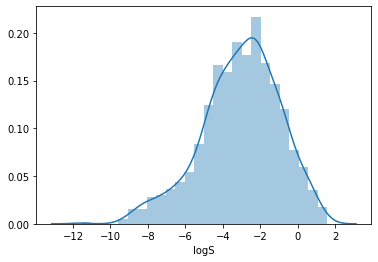

In [19]:
sns.distplot(esol_data[VALUE_COLUMN])

In [41]:
PROCESSED_PATH = "../data/1_filtering/esol_freesolv/esol.csv"

esol_data.to_csv(PROCESSED_PATH)

# FreeSolv

In [23]:
FILENAME = 'FreeSolv.csv'

In [27]:
SMILES_COLUMN = 'smiles'
VALUE_COLUMN_OLD = 'expt'
VALUE_COLUMN = 'Energy'

In [25]:
data = pd.read_csv(os.path.join(DATA_PATH, FILENAME))

In [26]:
data.columns

Index(['iupac', 'smiles', 'expt', 'calc'], dtype='object')

In [28]:
freesolv_data = pd.DataFrame(columns = [SMILES_COLUMN, VALUE_COLUMN])
freesolv_data[SMILES_COLUMN] = data[SMILES_COLUMN]
freesolv_data[VALUE_COLUMN] = data[VALUE_COLUMN_OLD]

In [29]:
def check_na(df, column):
    n = df.shape[0]
    num_of_na = df[column].isna().sum()
    frac_of_na = int(100.0*(num_of_na / n))
    print("# of NA values " + column + ": " + str(num_of_na) + ", " + str(frac_of_na) + "%")
    print(df[df[column].isna()].head())

In [30]:
freesolv_data.head()

,smiles,Energy
0,CN(C)C(=O)c1ccc(cc1)OC,-11.01
1,CS(=O)(=O)Cl,-4.87
2,CC(C)C=C,1.83
3,CCc1cnccn1,-5.45
4,CCCCCCCO,-4.21


In [31]:
freesolv_data.shape

(642, 2)

In [32]:
check_na(freesolv_data, SMILES_COLUMN)

# of NA values smiles: 0, 0%
Empty DataFrame
Columns: [smiles, Energy]
Index: []


In [33]:
check_na(freesolv_data, VALUE_COLUMN)

# of NA values Energy: 0, 0%
Empty DataFrame
Columns: [smiles, Energy]
Index: []


In [34]:
freesolv_data.duplicated().sum()

0

<AxesSubplot:xlabel='Energy'>

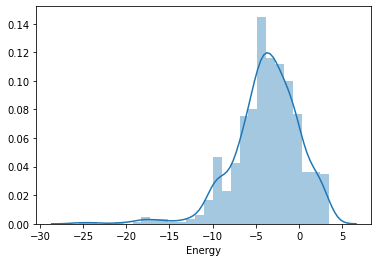

In [35]:
sns.distplot(freesolv_data[VALUE_COLUMN])

In [39]:
PROCESSED_PATH = "../data/1_filtering/esol_freesolv/freesolv.csv"

freesolv_data.to_csv(PROCESSED_PATH)